In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('/content/drive/MyDrive/clickbait_data.csv')

In [4]:
data.head()

,headline,clickbait
0,Should I Get Bings,1
1,Which TV Female Friend Group Do You Belong In,1
2,"The New ""Star Wars: The Force Awakens"" Trailer...",1
3,"This Vine Of New York On ""Celebrity Big Brothe...",1
4,A Couple Did A Stunning Photo Shoot With Their...,1


In [5]:
data.tail()

,headline,clickbait
31995,"To Make Female Hearts Flutter in Iraq, Throw a...",0
31996,"British Liberal Democrat Patsy Calton, 56, die...",0
31997,Drone smartphone app to help heart attack vict...,0
31998,"Netanyahu Urges Pope Benedict, in Israel, to D...",0
31999,Computer Makers Prepare to Stake Bigger Claim ...,0


In [6]:
data.shape

(32000, 2)

In [7]:
data.isnull().sum()

headline     0
clickbait    0
dtype: int64

In [8]:
data["clickbait"].value_counts()

0    16001
1    15999
Name: clickbait, dtype: int64

Dataset consists Total 32000 data and The clickbait and not clickbait data is around 50:50 %

Also there is no empty cell and datatype of each data is all 'ok' in dataset so data cleaning is not required !!

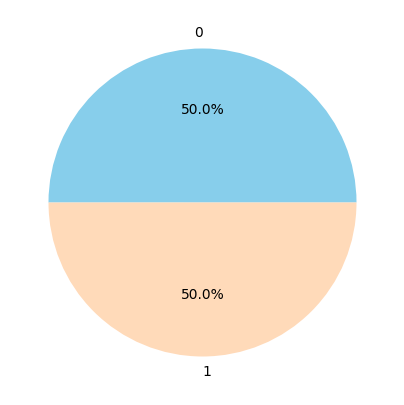

In [9]:
fig= plt.subplots(figsize=(19, 5))
g2 = plt.pie(data["clickbait"].value_counts().values,explode=[0,0],labels=data['clickbait'].value_counts().index, autopct='%1.1f%%',colors=['SkyBlue','PeachPuff'])


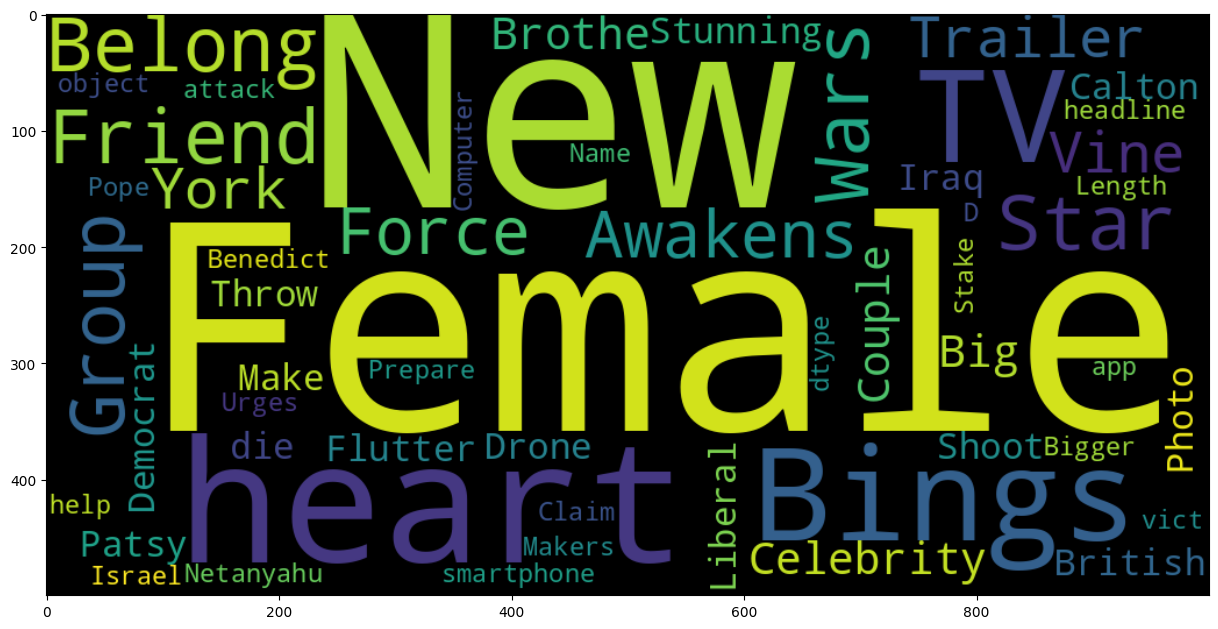

In [10]:
from wordcloud import WordCloud,STOPWORDS
plt.figure(figsize = (15,15))
wc = WordCloud(max_words = 1000 , width = 1000 , height = 500).generate(str(data.headline))
plt.imshow(wc , interpolation = 'bilinear')

Text(0.5, 1.0, 'Headline')

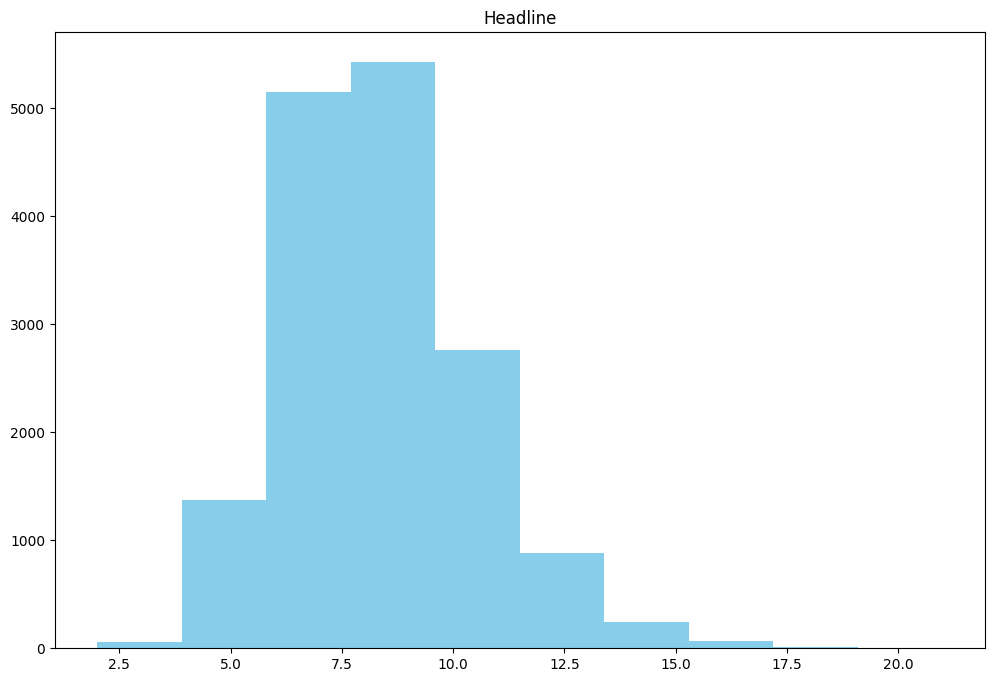

In [11]:
fig,ax1=plt.subplots(figsize=(12,8))
text_len=data[data['clickbait']==0]['headline'].str.split().map(lambda x: len(x))
ax1.hist(text_len,color='SkyBlue')
ax1.set_title('Headline')

In [12]:
import nltk
import seaborn as sns
def draw_n_gram(string,i):
    n_gram = (pd.Series(nltk.ngrams(string, i)).value_counts())[:15]
    n_gram_df=pd.DataFrame(n_gram)
    n_gram_df = n_gram_df.reset_index()
    n_gram_df = n_gram_df.rename(columns={"index": "word", 0: "count"})
    print(n_gram_df.head())
    plt.figure(figsize = (16,9))
    return sns.barplot(x='count',y='word', data=n_gram_df)

     word  count
0  (The,)   4894
1  (You,)   4824
2   (in,)   4360
3   (to,)   3401
4   (To,)   3254


<Axes: xlabel='count', ylabel='word'>

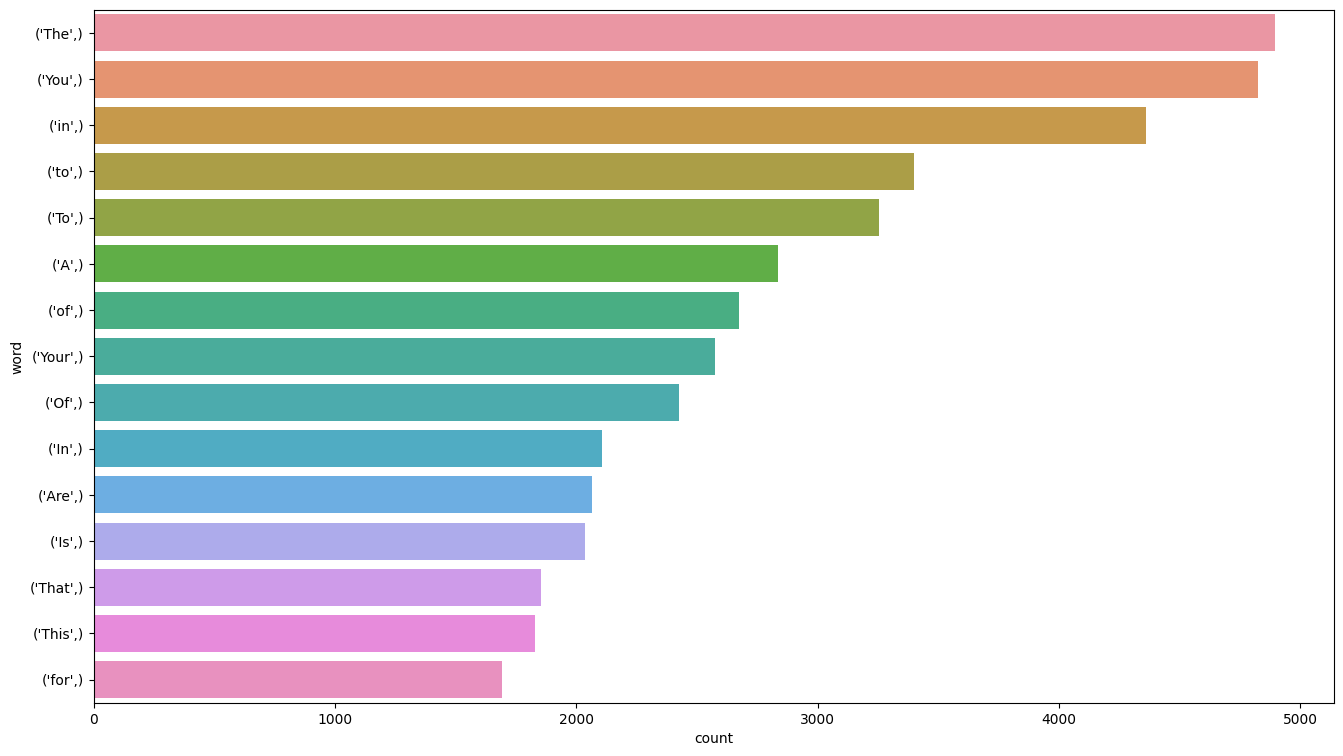

In [14]:
texts = ' '.join(data['headline'])
string = texts.split(" ")
draw_n_gram(string,1)

           word  count
0    (Are, You)    757
1   (Based, On)    596
2     (Do, You)    468
3    (On, Your)    466
4  (That, Will)    444


<Axes: xlabel='count', ylabel='word'>

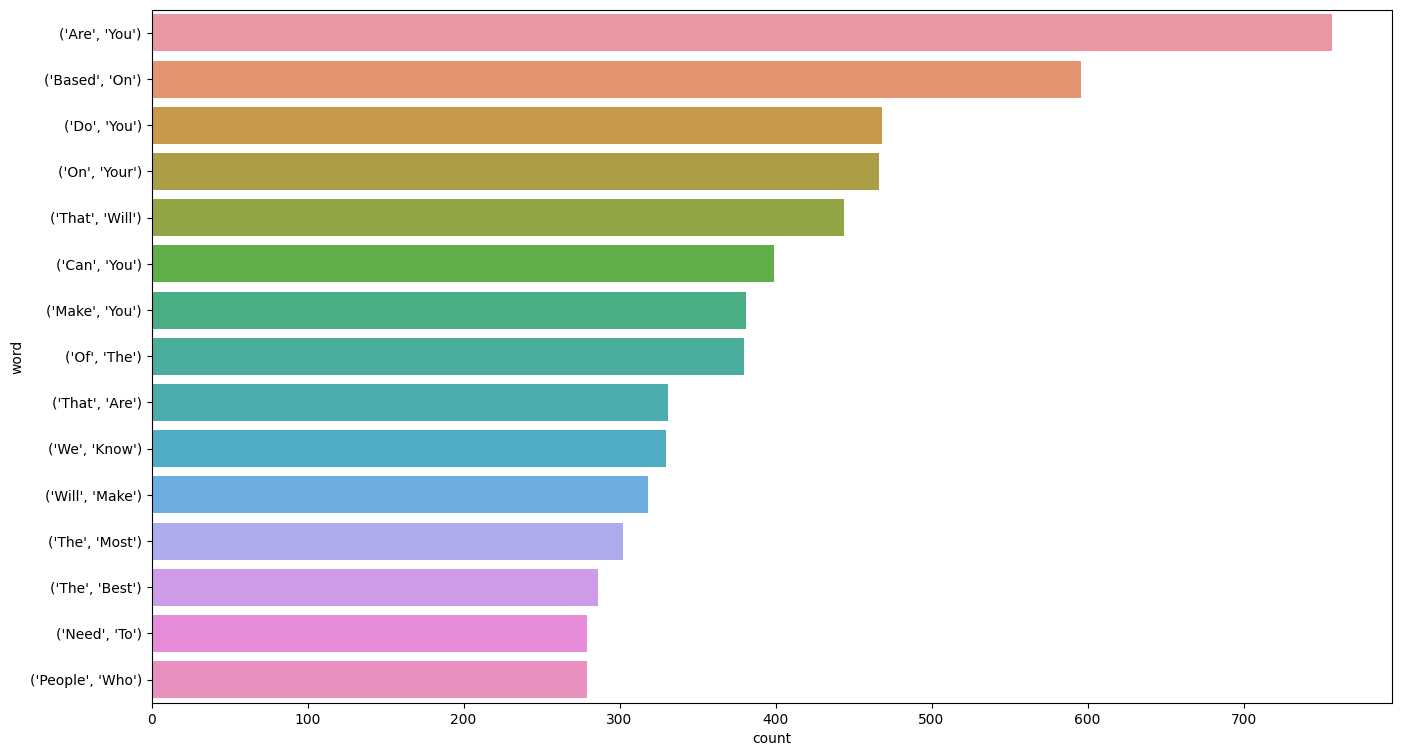

In [15]:
texts = ' '.join(data['headline'])
string = texts.split(" ")
draw_n_gram(string,2)

                   word  count
0     (Based, On, Your)    440
1     (Will, Make, You)    243
2    (That, Will, Make)    222
3    (On, Your, Zodiac)    214
4  (Your, Zodiac, Sign)    207


<Axes: xlabel='count', ylabel='word'>

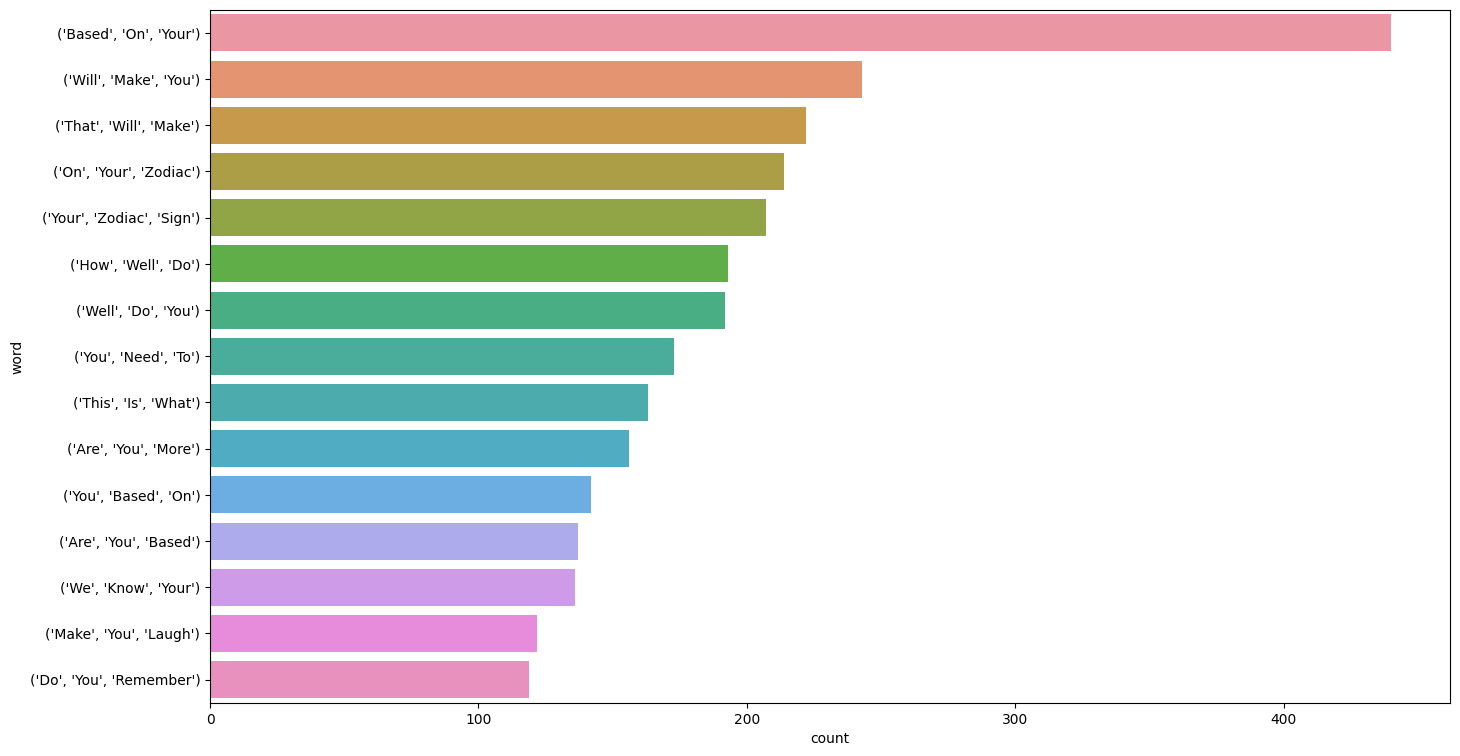

In [16]:
texts = ' '.join(data['headline'])
string = texts.split(" ")
draw_n_gram(string,3)

                        word  count
0  (Based, On, Your, Zodiac)    214
1       (How, Well, Do, You)    192
2    (That, Will, Make, You)    171
3   (On, Your, Zodiac, Sign)    157
4     (You, Based, On, Your)    135


<Axes: xlabel='count', ylabel='word'>

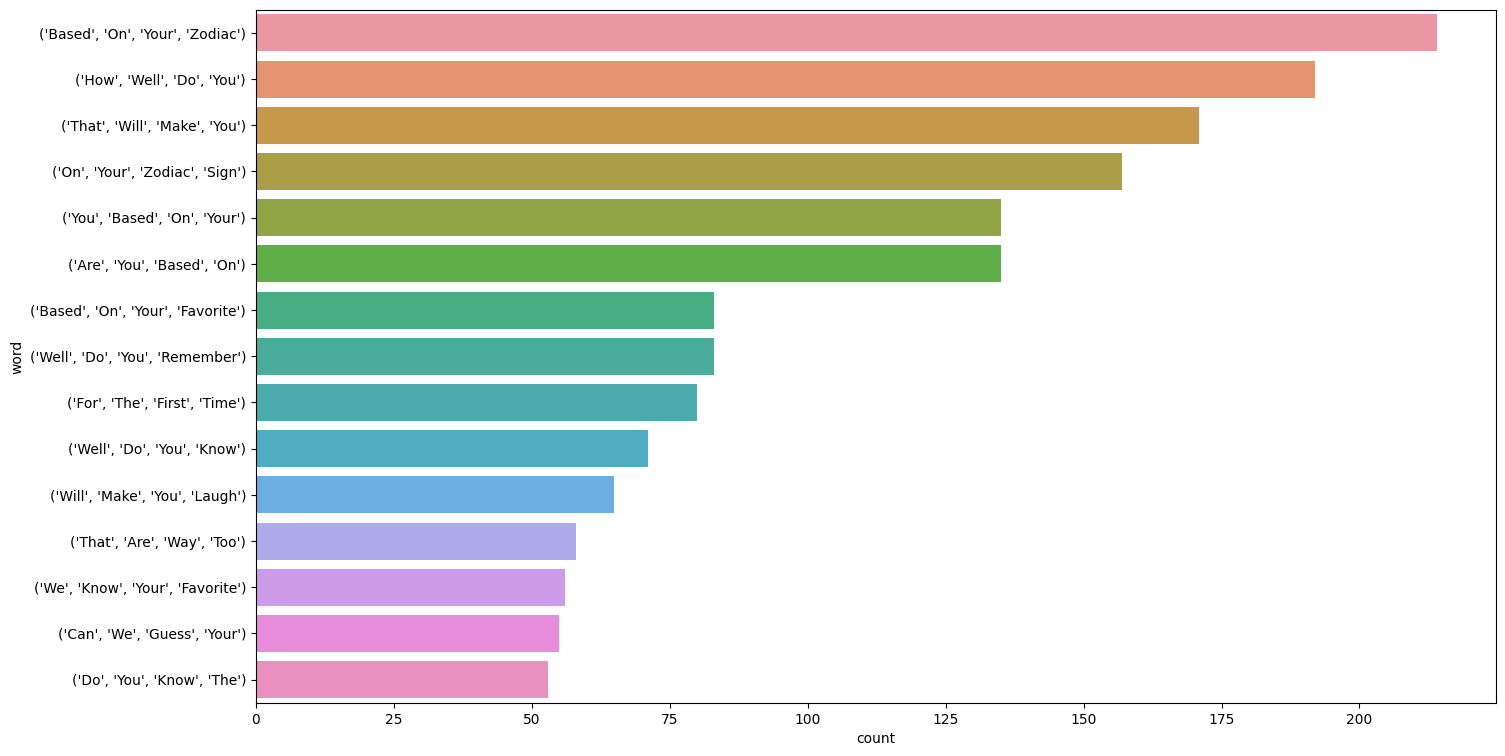

In [17]:
texts = ' '.join(data['headline'])
string = texts.split(" ")
draw_n_gram(string,4)